# Probabilistic Graphical Models

*For further detailed information regarding Probabilistic Graphical Models, refer to the Chapter 8 of the book "Pattern Recognition and Machine Learning", by Christopher M. Bishop.*

In probability theory it is possible to solve and deduce most of the problems using two fundamental rules:

* Sum rule $$p(X)=\sum_{Y} p(X,Y)$$ 

* Product rule $$p(X,Y)=p(Y|X)p(X)$$

However, when it comes to more complex problems, it can be useful to represent our probability distribution using a diagrammatic representation.<p>**Graphical Models** (GM) are a type of probabilistic models that allow to represent a joint probability distribution as a graph considering the dependencies among the variables in use. They can help to an easier interpretation of the distribution and, furthermore, a graph is a more efficient representation for a computer.

## Graph Theory and Probability

To understand GM we first need to know what a graph is. We can define a **graph** as a group of nodes where some of them are connected among themselves through edges. A simple example of a 4-node graph can be:

<img src="resources/graph.png" width="100">

In graphical models, the graph above represents a joint probability of 4 variables A, B, C and D,  $p (A,B,C,D)$.<p> Now, to understand the dependencies represented by the GM, we first need to know two different types of graphs: undirected and directed graphs. As the name says, an undirected graph is a graph where its connections do not follow a particular direction. In other words, it is possible to iterate over the graph in both directions of the edges.<p> A directed graph is a graph where the nodes are connected according to a specific direction defined by an arrow in the edges between them. In a directed graph, it is only possible to iterate over it in one direction. In GM, these connections represents a relationship between both variables. 

<img src="dir_undir.png" width="300">

In conclusion, in graph **a)** the **path A->C** is possible while in **b)** only **C->A** is possible, since it is directed. In the case of the directed graph **b)**, the node A is called a **descendant** of C and B.

## Conditional Independence in Graphical Models

Now that we know what a graph is we can see how to represent a joint distribution as a GM and the depndencies between the variables.<br>We enhanced the difference between directed and undirected graphs because the representation will have a different meaning depending on the type of graph.<br>Firstly, let's introduce the concept of conditional independence.
We say that two events are conditionally independent if they are independent given a third event. Consider three variables A, B and C. So, we say that **A is conditionally independent of B given C** if<p> $$p(A,B|C)=p(A|B,C)p(B|C)=p(A|C)p(B|C)$$<br>which is equivalent to write $$p(A|B,C)=p(A|C)$$<p>The short notation used to represent conditional independence is $A \perp\!\!\!\perp B \: | \: C$ .

### Directed Graphical Models

Consider the following joint probability: $$p(A,B,C)=p(A)p(B)p(C|A,B)$$

This is a simple probability function, but we can represent it as a graphical model. 


<img src="resources/pgm_1.png" width="150">

As we saw before, the connection A->C and B->C means that there is a relationship between them. If we read the probability function and look to the graph at the same time, we can see two single variables represented by A and B. Thus, these are represented as the first nodes of the graph. The term $p(C|A,B)$ tells that C is conditioned on A and B. So, in the graph we create a connection that goes from A to C and B to C. The arrow on the edge indicates that the variable pointed is conditioned on the variable on the other end of the edge.<br>By simply looking to the GM, we can easily say that, given nothing, the variable A is independent of the variable B! This is short noted as $A \perp\!\!\!\perp B \: |\: \emptyset$ . In a directed graph we can see that by looking to A and B and see if the path between them is "blocked".

Meanwhile, if we observe the variable C, the scenario is different. 

<img src="resources/pgm_2.png" width="150">

So, in this case we can say that, given C, the conditional independency property between A and B does not hold! We represent this as $A \not\!\perp\!\!\!\perp B \: |\: C$ . This happens because if we know C, then the path between A and B is not "blocked" anymore. In other words, by knowing C we have a straight connection between A and B. <br> So knowing this we can infer independency from a directed GM following the concept of **d-separation**. Two nodes are said to be d-separated if the path between both is "blocked". We say that the path is "blocked" by considering two rules; given C (observing C), A is said to be d-separated from B if any path between them contains a node such that:
* the arrows on the path from A to B meet either head-to-tail or tail-to-tail at the node and the node is in the set C
* the arrows meet head-to-head at the node and neither the node or any of its descendants is part of the set C

#### Examples of directed GM and probability functions

1. Consider the probability function $$p(A,B,C)$$<br>By applying the product rule and the Bayes rule, we have that $$p(A,B,C)=p(A|B,C)p(B,C)$$ <br>$$=p(A|B,C)p(B)p(C|B)$$ <br>$$=\frac{p(A|B,C)p(B)p(B|C)p(C)}{p(B)}$$<br>$$=p(A|B,C)p(B|C)p(C)$$<p>
So now that we have simplified our function, we can represent it as a GM.<p>
<img src="resources/pgm_3.png" width="150">
<p>If we refer back again to the conditional independency rules stated above, we can see that in this example we cannot infer conditional independence over any group of variables, either we observe one of them or not.
    

2. Now consider the following graphical model
<p>
<img src="resources/pgm_4.png" width="150">
<p> By looking to the graph, we can easily write the corresponding probability function as<p> $$p(A,B,C)=p(C)p(B|C)p(A|C)$$<p>
Now, is A conditionally independent on B given nothing? If we look again to the graph, we can see that the arrows of A and B meet tail-to-tail in the node C. However, we are not observing the node C, so the rules that we defined above do not verify here. So, according to our rules, the path is not "blocked" and the conditional independency between A and B given nothing does not hold, i.e., $A \not\!\perp\!\!\!\perp B \: |\: \emptyset$.
<p><p>
Let's now consider the same problem but observing C. Is A conditionally independent of B given C? <p>
<img src="resources/pgm_5.png" width="150">
<p>
Let's observe our new graph and look again to the d-separated rules. Like before, we can see that the arrows of A and B meet tail-to-tail in the node C but now we are observing the node C. So according to our rules, we have enough evidence to say that A is conditionally independent on B given C, i.e., $A \perp\!\!\!\perp B \: |\: C$ .

### Undirected Graphical Models

We have seen how to interpret directed GM. With undirected GM, the procedure is not the same.<br>
As we saw before, in undirected graphs the edges have no direction. Thus, we cannot use the d-separated rules to see if two nodes are conditionally independent. Consider the following GM<p>
<img src="resources/pgm_6.png" width="200"><p>
In this type of GM, instead of edges representing dependencies, we identify dependencies according to the concept of **clique**. A clique is a subset of nodes in the graph, such that there is a connection between all pairs of nodes in that subset. In this case, the pairs of cliques are $(A,C),\:,(C,B),\:(A,B),\:(A,D),\:(D,E),\:(D,F),\:(A,B,C)$. We say that $(A,B,C)$ is a maximal clique. We can write this graph as the product of joint distributions $$p(A,B,C,D,E,F)=p(A,B,C)p(A,D)p(D,E)p(D,F)$$
<p>In this sense, in an undirected GM, we investigate conditional independence based on the connections between two sets of nodes, while observing a third set. Consider three sets of nodes $X,\: Y,\:$ and $Z\:$. If the nodes in the set $Z$ are blocking the path between any pair of nodes formed by a node from $X$ and a node from $Y$, then we say that the set $X$ is conditionally independent on $Y$ given $Z$.<br>
Let's use the same GM and observe a set $Z$ formed by the nodes $A$ and $D$. Then, let $X$ be a set formed by $B$ and $C$. and $Y$ a set formed by the node $E$
<img src="resources/pgm_7.png" width="200"><p>
In this case, we can see that it is impossible to get from any node on the set $X$ to a node in the set $Y$ (which in this case is just formed by the node $E$), since the clique formed by the set $Z$ is blocking the way. So, we say that $X \perp\!\!\!\perp Y \: |\: Z$ . Another way of confirming conditional independence here is by removing the set $Z$ from the graph. We can see that, if we remove that set, then the graph breaks apart and lose all the connections between $X$ and $Y$. So, they are conditionally indendent given $Z$.<br>
As you can see, it is even easier to check for conditional independence in this second type of GM.

## Factor Graphs

By far we have seen how to represent GMs as directed and undirected graphs and check for conditional independence.
<br>
However, we can represent them also as a product of factors over the variables that form the probability distribution. We can this representation a Factor Graph.
<br>
Consider the following probability function $$p(x_1, x_2, x_3) = p(x_3)p(x_1|x_3)p(x_2|x_3)$$
<br>
As we have seen before, this probability function can be represented as the following directed graph:
    <img src="resources/pgm_9.png" width="150">
<br>
To convert it into a Factor Graph, we just need to rewrite the probbability function as a product of factors over the variables. By looking to the function, we can write three factors where each one corresponds to the factors of the given probability distribution,<p> $$f_a(x_1,x_3) = p(x_1|x_3)$$<br> $$f_b(x_2,x_3) = p(x_2|x_3)$$<br> $$f_c(x_3) = p(x_3)$$ 
<p>Given the factors, we can represent the corresponding factor graph as<p>
    <img src="resources/factor_graph_2.png" width="300">
<p>
This way, we are representing the same probability distribution but now as a product of factors allowing to represent more detailed information about the factorization. In this case, we can say that $f_a$ is a normalized distribution of $x_1$ and depends on $x_3$, $f_b$ is a normalized distribution of $x_2$ and depends on $x_3$ and $f_c$ is a normalized distribution of $x_3$. This way, we can write our probability distribution function as a product of factors,<p> $$p(x_1,x_2,x_3) = f_c(x_3)f_a(x_1,x_3)f_b(x_2,x_3)$$
<p>
At this point, using the factor graph we can do inference. For example, if we ask what is the marginal distribution of $x_3$?
To calculate this distribution, we use an algorithm called <b>The Sum-Product Algorithm</b>.<br>
Recall the sum rule mentioned in the beginning of this tutorial. Then we can write <p> $$p(x_3)=\sum_{x_1}\sum_{x_2} p(x_1,x_2,x_3)$$<p>
Using our factorized probability distribution function, we can rewrite this as <p>
$$p(x_3)=f_c(x_3)\left[\sum_{x_1}f_a(x_1,x_3)\right]\left[\sum_{x_2}f_b(x_2,x_3)\right]$$
   <p> $$=m_{f_c\to x_3}(x_3)\cdot m_{f_a\to x_3}(x_3) \cdot m_{f_b\to x_3}(x_3)$$
<p>
where $m$ are messages that the factors send to $x_3$. 
<br>At this point, we have deduced how to calculate the marginal distribution of $x_3$ in this particular graph.

## PGM with Python

Now that we have learnt about Probailistic Graphical Models, we are ready to apply them in practice. To do that, we are going to use a Python library called **pgmpy**. The documentation can be found through this [link](https://pgmpy.org/). The instalation instructions can also be found in this [link](https://github.com/pgmpy/pgmpy#installation).

In [193]:
# in this example, we will use one of the built in examples of pgmpy
from pgmpy.utils import get_example_model

model = get_example_model('earthquake')

In [194]:
print('Nodes: ', model.nodes())
print('Edges: ', model.edges())

# display conditional probability distribution functions of each node
model.get_cpds()

Nodes:  ['Burglary', 'Earthquake', 'Alarm', 'JohnCalls', 'MaryCalls']
Edges:  [('Burglary', 'Alarm'), ('Earthquake', 'Alarm'), ('Alarm', 'JohnCalls'), ('Alarm', 'MaryCalls')]


[<TabularCPD representing P(Alarm:2 | Burglary:2, Earthquake:2) at 0x23a08a30888>,
 <TabularCPD representing P(Burglary:2) at 0x23a0ae45b08>,
 <TabularCPD representing P(Earthquake:2) at 0x23a0ae45b88>,
 <TabularCPD representing P(JohnCalls:2 | Alarm:2) at 0x23a0ae45a88>,
 <TabularCPD representing P(MaryCalls:2 | Alarm:2) at 0x23a0ae45508>]

This GM is already constructed. We have printed the nodes and edges to have an idea of its shape. Furthermore, by calling ```get_cpds()```, we can see the probability functions associated to each node. For example, we know that the node Burglary has a probability function $p(Burglary)$ with two possible outcomes, while the node Alarm is conditioned on the variables Burglary and Earthquake, all with two possible outcomes as well. This GM was obtained from [here](https://www.bnlearn.com/bnrepository/discrete-small.html#earthquake), represented as<p>
<img src="resources/earthquake.png" width="300">

By looking to the GM and to the conditional probability distribution functions we can understand how the different variables are related to each other. Lets now use pgmpy to do inference on our model.

In [195]:
from pgmpy.inference import VariableElimination

# initialize inference by elimination of a variable, similar to what we demonstrated before
infer = VariableElimination(model)

In [196]:
# now that we have initialized inference model, we can use it to do inference in our model

# for example, lets infer the distribution of the variable Earthquake

q = infer.query(variables=['Earthquake'])
print(q)

Eliminating: MaryCalls: 100%|███████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 445.49it/s]


+-------------------+-------------------+
| Earthquake        |   phi(Earthquake) |
+===================+===================+
| Earthquake(True)  |            0.0200 |
+-------------------+-------------------+
| Earthquake(False) |            0.9800 |
+-------------------+-------------------+


In [197]:
# so, we now know the distribution of the variable Earthquake, that can be True 2% of the times and False 98%

# say now that we want to know the distribution of the variable Alarm when the variable Burglary is True
# in other words, p(Alarm | Burglary=True) is the distribution function to infer

q2 = infer.query(variables=['Alarm'], evidence={'Burglary':'True'})
print(q2)

Eliminating: Earthquake: 100%|██████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 667.14it/s]


+--------------+--------------+
| Alarm        |   phi(Alarm) |
+==============+==============+
| Alarm(True)  |       0.9402 |
+--------------+--------------+
| Alarm(False) |       0.0598 |
+--------------+--------------+


In [198]:
# this means that, if a burglary occurs, the probability of the alarm ringing is 94.02%
# likewise, we can do a lot of different inferences in our model

# lets try now a joint distribution of Alarm and MaryCalls given Burglary=True
q3 = infer.query(variables=['Alarm', 'MaryCalls'], evidence={'Burglary':'True'})
print(q3)

Eliminating: Earthquake: 100%|██████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 668.41it/s]


+--------------+------------------+------------------------+
| Alarm        | MaryCalls        |   phi(Alarm,MaryCalls) |
+==============+==================+========================+
| Alarm(True)  | MaryCalls(True)  |                 0.6581 |
+--------------+------------------+------------------------+
| Alarm(True)  | MaryCalls(False) |                 0.2821 |
+--------------+------------------+------------------------+
| Alarm(False) | MaryCalls(True)  |                 0.0006 |
+--------------+------------------+------------------------+
| Alarm(False) | MaryCalls(False) |                 0.0592 |
+--------------+------------------+------------------------+


In [199]:
# recall the independeny concepts we learnt before
# we can check for indepencency among the variables of our model

for node in model.nodes():
    print(model.local_independencies(node))

(Burglary _|_ Earthquake)
(Earthquake _|_ Burglary)

(JohnCalls _|_ Earthquake, Burglary, MaryCalls | Alarm)
(MaryCalls _|_ JohnCalls, Burglary, Earthquake | Alarm)


So, as we have seen before, Burglary and Earthquake are independent, since according to the rules we defined above, the arrows of the nodes meet head-to-head at a third node (Alarm), and Alarm is not given.
<br>
Regarding the nodes JohnCalls and MaryCalls, we can say that they are independent on all the other nodes if we observe Alarm. This is confirmed by the other rule, where the arrows on the path of the two nodes meet tail-to-tail or head-to-tail at one node (Alarm) and that node is observed.

In [200]:
# we can also use the maximum a posteriori (MAP) to predict the most likely value for a certain variable of our model
# say that we want to predict the most likely value for Alarm
print(infer.map_query(['Alarm']))

# and now given burglary=True
print(infer.map_query(['Alarm'], evidence={'Burglary':'True'}))

Eliminating: MaryCalls: 100%|███████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 802.20it/s]


{'Alarm': 'False'}


Eliminating: Earthquake: 100%|██████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 429.86it/s]


{'Alarm': 'True'}


In [201]:
# lets try now to create our own pgm from an external dataset
import pandas as pd

# load dataset
df = pd.read_csv('winequality.csv', sep=';', na_values='?', engine='python')

In [202]:
# lets see what are we dealing with
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [203]:
# check for null or nan values
print(df.any().isnull())
print(df.any().isna())

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool
fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [204]:
for column in df.columns:
    print("Unique values for {}: {}".format(column, len(df[column].unique())))
    print(df[column].value_counts())
    print('-'*32)

Unique values for fixed acidity: 96
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.4     1
14.0     1
5.5      1
4.6      1
4.7      1
Name: fixed acidity, Length: 96, dtype: int64
--------------------------------
Unique values for volatile acidity: 143
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.090     1
1.035     1
1.580     1
0.950     1
0.805     1
Name: volatile acidity, Length: 143, dtype: int64
--------------------------------
Unique values for citric acid: 80
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.75      1
0.78      1
1.00      1
0.62      1
0.72      1
Name: citric acid, Length: 80, dtype: int64
--------------------------------
Unique values for residual sugar: 91
2.00    156
2.20    131
1.80    129
2.10    128
1.90    117
       ... 
5.70      1
2.85      1
7.30      1
8.90      1
2.65      1
Name: residual sugar, Length: 91, dtype: int64
--------------------------------
Unique values for

In [205]:
# now remember that to build a gm, it is unpractical to have many unique values in each feature of our dataset
# we just saw that we have multiple features with many unique values
# lets create intervals for them so we can transform them in groups. lets try 3 intervals
import numpy as np

df_int = df.copy()

for j, column in enumerate(df_int.columns):
    if len(df_int[column].unique()) > 3:
        intervals = pd.qcut(df_int[column], 3)
        for i in range(len(df_int)):
            df_int.iloc[i, j] = str(intervals[i].left) + ' to ' + str(intervals[i].right)
        
df_int

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,4.598999999999999 to 7.4,0.6 to 1.58,-0.001 to 0.15,0.899 to 2.0,0.074 to 0.085,10.0 to 18.0,26.0 to 52.0,0.997 to 1.004,3.37 to 4.01,0.329 to 0.57,8.399000000000001 to 9.7,2.999 to 5.0
1,7.4 to 8.8,0.6 to 1.58,-0.001 to 0.15,2.4 to 15.5,0.085 to 0.611,18.0 to 72.0,52.0 to 289.0,0.996 to 0.997,2.7390000000000003 to 3.25,0.57 to 0.68,9.7 to 10.8,2.999 to 5.0
2,7.4 to 8.8,0.6 to 1.58,-0.001 to 0.15,2.0 to 2.4,0.085 to 0.611,10.0 to 18.0,52.0 to 289.0,0.996 to 0.997,3.25 to 3.37,0.57 to 0.68,9.7 to 10.8,2.999 to 5.0
3,8.8 to 15.9,0.119 to 0.43,0.363 to 1.0,0.899 to 2.0,0.074 to 0.085,10.0 to 18.0,52.0 to 289.0,0.997 to 1.004,2.7390000000000003 to 3.25,0.57 to 0.68,9.7 to 10.8,5.0 to 6.0
4,4.598999999999999 to 7.4,0.6 to 1.58,-0.001 to 0.15,0.899 to 2.0,0.074 to 0.085,10.0 to 18.0,26.0 to 52.0,0.997 to 1.004,3.37 to 4.01,0.329 to 0.57,8.399000000000001 to 9.7,2.999 to 5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,4.598999999999999 to 7.4,0.43 to 0.6,-0.001 to 0.15,0.899 to 2.0,0.085 to 0.611,18.0 to 72.0,26.0 to 52.0,0.989 to 0.996,3.37 to 4.01,0.57 to 0.68,9.7 to 10.8,2.999 to 5.0
1595,4.598999999999999 to 7.4,0.43 to 0.6,-0.001 to 0.15,2.0 to 2.4,0.011 to 0.074,18.0 to 72.0,26.0 to 52.0,0.989 to 0.996,3.37 to 4.01,0.68 to 2.0,10.8 to 14.9,5.0 to 6.0
1596,4.598999999999999 to 7.4,0.43 to 0.6,-0.001 to 0.15,2.0 to 2.4,0.074 to 0.085,18.0 to 72.0,26.0 to 52.0,0.989 to 0.996,3.37 to 4.01,0.68 to 2.0,10.8 to 14.9,5.0 to 6.0
1597,4.598999999999999 to 7.4,0.6 to 1.58,-0.001 to 0.15,0.899 to 2.0,0.074 to 0.085,18.0 to 72.0,26.0 to 52.0,0.989 to 0.996,3.37 to 4.01,0.68 to 2.0,9.7 to 10.8,2.999 to 5.0


In [206]:
for column in df_int.columns:
    print("Unique values for {}: {}".format(column, len(df_int[column].unique())))
    print(df_int[column].value_counts())
    print('-'*32)

Unique values for fixed acidity: 3
4.598999999999999 to 7.4    574
7.4 to 8.8                  525
8.8 to 15.9                 500
Name: fixed acidity, dtype: int64
--------------------------------
Unique values for volatile acidity: 3
0.119 to 0.43    555
0.43 to 0.6      540
0.6 to 1.58      504
Name: volatile acidity, dtype: int64
--------------------------------
Unique values for citric acid: 3
-0.001 to 0.15    538
0.363 to 1.0      533
0.15 to 0.363     528
Name: citric acid, dtype: int64
--------------------------------
Unique values for residual sugar: 3
0.899 to 2.0    620
2.4 to 15.5     519
2.0 to 2.4      460
Name: residual sugar, dtype: int64
--------------------------------
Unique values for chlorides: 3
0.011 to 0.074    571
0.085 to 0.611    530
0.074 to 0.085    498
Name: chlorides, dtype: int64
--------------------------------
Unique values for free sulfur dioxide: 3
0.999 to 10.0    605
18.0 to 72.0     508
10.0 to 18.0     486
Name: free sulfur dioxide, dtype: int64

In [207]:
# at this point we are roking with a maximum of 3 unique values per feature
# to create our gm we will use the HillClimbSearch estimator and will use the Bayesian Information Criterion score metric
from pgmpy.estimators import BicScore, HillClimbSearch, MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel

estimator = HillClimbSearch(df_int)

# estimate the structure of the gm according to the given metric
model_estim = estimator.estimate(scoring_method=BicScore(df_int))
edges = list(model_estim.edges())

# finally lets create our model from the obtained structure
model = BayesianModel(edges)

  0%|                                                                          | 17/1000000 [00:01<29:16:24,  9.49it/s]


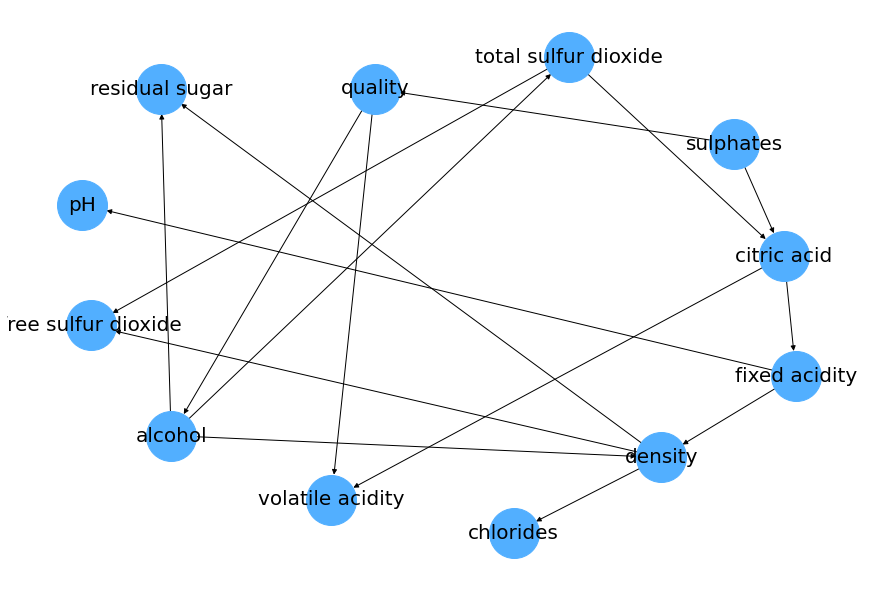

In [208]:
# now lets draw our graphical model

import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

plt.figure(figsize=(12,8))

nx.draw(model, pos= nx.spring_layout(model), with_labels=True, node_size=2500, node_color="#52AFFF", font_size = 20)
plt.show()

In [209]:
# but we still need to find the conditional probability distributions corresponding to each node
# in order to do that, pgmpy allows to use a MaximumLikelihood estimator to estimate the CPD
model.fit(df_int, estimator=MaximumLikelihoodEstimator)

# as we did in the previous example, lets now initialize our inference module
infer = VariableElimination(model)

In [223]:
# now we ready to do inference
# lets start by infering about the pH of the wine
q = infer.query(variables=['pH'])
print(q)

Eliminating: volatile acidity: 100%|███████████████████████████████████████████████████| 11/11 [00:00<00:00, 49.29it/s]


+--------------------------------+-----------+
| pH                             |   phi(pH) |
+================================+===========+
| pH(2.7390000000000003 to 3.25) |    0.3440 |
+--------------------------------+-----------+
| pH(3.25 to 3.37)               |    0.3309 |
+--------------------------------+-----------+
| pH(3.37 to 4.01)               |    0.3251 |
+--------------------------------+-----------+


In [224]:
# now about the citric acid of the wine
q2 = infer.query(variables=['citric acid'])
print(q2)

Eliminating: volatile acidity: 100%|██████████████████████████████████████████████████| 11/11 [00:00<00:00, 176.21it/s]


+-----------------------------+--------------------+
| citric acid                 |   phi(citric acid) |
+=============================+====================+
| citric acid(-0.001 to 0.15) |             0.3355 |
+-----------------------------+--------------------+
| citric acid(0.15 to 0.363)  |             0.3315 |
+-----------------------------+--------------------+
| citric acid(0.363 to 1.0)   |             0.3330 |
+-----------------------------+--------------------+


In [225]:
# now that we know about the pH and the citric acid, what happens if we do inference about the pH
# given the evidence that the citric acid lies in the interval 0.363 to 1.0
q3 = infer.query(variables=['pH'], evidence={'citric acid':'0.363 to 1.0'})
print(q3)

Eliminating: volatile acidity: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 257.08it/s]


+--------------------------------+-----------+
| pH                             |   phi(pH) |
+================================+===========+
| pH(2.7390000000000003 to 3.25) |    0.5510 |
+--------------------------------+-----------+
| pH(3.25 to 3.37)               |    0.3016 |
+--------------------------------+-----------+
| pH(3.37 to 4.01)               |    0.1474 |
+--------------------------------+-----------+


In [233]:
# we just saw that as expected the probability for a lowe pH increased, what makes sense since we gave the evidence
# of a high amount of citric acid
# as in the previous example, we can also infer for some variable using the maximum a posteriori
# lets try with the variable alcohol given a pH value as evidence

print(infer.map_query(['alcohol'], evidence={'pH':'2.7390000000000003 to 3.25'}))

Eliminating: quality: 100%|███████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 125.42it/s]


{'alcohol': '10.8 to 14.9'}


In [234]:
# thus in this case we can say with some level of certainty that if the pH lies between 2.7390000000000003 and 3.25,
# then it is very likely that the wine sample will have an alcoholic level bewteen 10.8 and 14.9